**Problem Statement: To Predict how likely individuals are to receive their H1N1 Vaccines.**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
vaccinetrain=pd.read_csv('/content/drive/MyDrive/H1N1 vaccine/training_set_features.csv')

In [4]:
vaccinetest=pd.read_csv('/content/drive/MyDrive/H1N1 vaccine/test_set_features.csv')

In [5]:
vaccinelabels=pd.read_csv('/content/drive/MyDrive/H1N1 vaccine/training_set_labels.csv')

In [6]:
vaccinetrain.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
vaccinetest.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [8]:
vaccinetrain.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [9]:
vaccinetrain.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [10]:
vaccinetrain.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [11]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [12]:
print(vaccinetrain.shape)
print(vaccinetest.shape)
print(vaccinelabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [13]:
vaccinetrain.isnull().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [14]:
vaccinetest.isnull().sum().sort_values(ascending=False)

employment_occupation          13426
employment_industry            13275
health_insurance               12228
income_poverty                  4497
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2036
employment_status               1471
marital_status                  1442
education                       1407
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
opinion_seas_sick_from_vacc      521
opinion_seas_risk                499
opinion_seas_vacc_effective      452
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
household_children               225
household_adults                 225
behavioral_avoidance             213
behavioral_touch_face            128
h1n1_knowledge                   122
h1n1_concern                      85
behavioral_outside_home           82
behavioral_antiviral_meds         79
b

In [15]:
vaccinelabels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


**EDA**

In [16]:
import plotly.express as px

In [17]:
px.histogram(vaccinetrain,
             x='education',
             color='sex',
             title='Education vs Sex'
             )

In [18]:
px.histogram(vaccinetrain,
             x='marital_status',
             color='sex',
             title='Marital Satus vs Sex')

In [19]:
px.histogram(vaccinetrain,
             x='race',
             color='sex',
             title='Race vs Sex')

***Hypothesis*** **Testing**

In [20]:
vaccinetrain.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [21]:
vaccinelabels.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [22]:
# As we can see both are categorical in nature we apply chi-sq test
# Null Hypothesis  - their is no asscociation between sex and h1n1
# Alt Hypothesis - thier is association between sex and h1n1
from scipy.stats  import chi2_contingency

In [23]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain.sex)

sex,Female,Male
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [24]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain.sex))
# Since p value <0.05 reject null

(11.309981152455997,
 0.0007709155489949327,
 1,
 array([[12488.90979893,  8544.09020107],
        [ 3369.09020107,  2304.90979893]]))

In [25]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain.income_poverty)

income_poverty,"<= $75,000, Above Poverty","> $75,000",Below Poverty
h1n1_vaccine,,,
0,10178,5087,2181
1,2599,1723,516


In [26]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain.income_poverty))
# Since p value < 0.05 reject null 

(76.29255373088357,
 2.7119548330435347e-17,
 2,
 array([[10003.03096392,  5331.50511578,  2111.4639203 ],
        [ 2773.96903608,  1478.49488422,   585.5360797 ]]))

In [27]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain.education)

education,12 Years,< 12 Years,College Graduate,Some College
h1n1_vaccine,,,,
0,4726,1968,7614,5579
1,1071,395,2483,1464


In [28]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain.education))
# since p value < 0.05 reject null

(123.04265449793024,
 1.7064066491282076e-26,
 3,
 array([[4556.71695652, 1857.43007905, 7936.72090909, 5536.13205534],
        [1240.28304348,  505.56992095, 2160.27909091, 1506.86794466]]))

In [29]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain.behavioral_face_mask)

behavioral_face_mask,0.0,1.0
h1n1_vaccine,,
0,19765,1255
1,5082,586


In [30]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain.behavioral_face_mask))
# Since p value<0.05 reject null

(131.95741785350663,
 1.528631890936478e-30,
 1,
 array([[19569.99175659,  1450.00824341],
        [ 5277.00824341,   390.99175659]]))

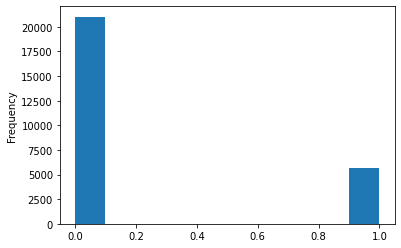

In [31]:
vaccinelabels.h1n1_vaccine.plot(kind='hist') # Imbalanced Data

we have missing values in both the train and test.

In [32]:
# Adding ID Column in both Dataframes
vaccinetrain['ID']='train'
vaccinetest['ID']='test'

In [33]:
# Row Wise Concatenation
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [34]:
combinedf.isnull().sum().sort_values(ascending=False)

employment_occupation          26896
employment_industry            26605
health_insurance               24502
income_poverty                  8920
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
rent_or_own                     4078
employment_status               2934
marital_status                  2850
education                       2814
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
opinion_seas_sick_from_vacc     1058
opinion_seas_risk               1013
opinion_seas_vacc_effective      914
opinion_h1n1_vacc_effective      789
opinion_h1n1_sick_from_vacc      770
opinion_h1n1_risk                768
household_children               474
household_adults                 474
behavioral_avoidance             421
behavioral_touch_face            256
h1n1_knowledge                   238
h1n1_concern                     177
behavioral_outside_home          164
behavioral_large_gatherings      159
b

In [35]:
fc=['employment_occupation','employment_industry',
    'health_insurance']
for col in fc:
    freq=combinedf[col].value_counts(dropna=False)
    print(freq)

NaN         26896
xtkaffoo     3526
mxkfnird     3070
emcorrxb     2554
cmhcxjea     2471
xgwztkwe     2220
hfxkjkmi     1491
qxajmpny     1047
xqwwgdyp      960
uqqtjvyb      953
kldqjyjy      915
tfqavkke      790
ccgxvspp      709
ukymxvdu      701
oijqvulv      690
vlluhbov      679
bxpfxfdn      662
haliazsg      596
rcertsgn      573
dlvbwzss      472
xzmlyyjv      464
hodpvpew      461
dcjcmpih      309
pvmttkik      206
Name: employment_occupation, dtype: int64
NaN         26605
fcxhlnwr     4952
wxleyezf     3609
ldnlellj     2455
pxcmvdjn     2115
arjwrbjb     1756
atmlpfrs     1748
xicduogh     1698
mfikgejo     1263
vjjrobsf     1094
rucpziij     1061
xqicxuve     1038
saaquncn      676
cfqqtusy      629
nduyfdeo      578
mcubkhph      537
wlfvacwt      427
dotnnunm      421
haxffmxo      308
msuufmds      256
phxvnwax      170
qnlwzans       19
Name: employment_industry, dtype: int64
1.0    25554
NaN    24502
0.0     3359
Name: health_insurance, dtype: int64


**Label Encoding**

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
combinedf=combinedf.astype(str)

In [39]:
mask=(combinedf=='nan')

In [41]:
combinedf[~mask]=combinedf[~mask].apply(LabelEncoder().fit_transform)

In [42]:
combinedf[mask]=np.nan

In [43]:
combinedf1=combinedf.drop(['respondent_id','ID'],axis=1)

**Missing Value Imputation using MICE imputer**

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [45]:
impute=IterativeImputer(initial_strategy='most_frequent')

In [46]:
combinedf_impute=impute.fit_transform(combinedf1)

In [47]:
combinedf_impute=pd.DataFrame(combinedf_impute,
                              columns=combinedf1.columns)

In [48]:
combinedf_impute=combinedf_impute.astype(int)

In [49]:
combinedf=combinedf.reset_index()

In [50]:
combinedf_impute['ID']=combinedf.ID

In [51]:
combinedf_impute.shape

(53415, 36)

In [52]:
vaccinetraindf=combinedf_impute[combinedf_impute.ID==1]
vaccinetestdf=combinedf_impute[combinedf_impute.ID==0]

In [53]:
vaccinetraindf=vaccinetraindf.drop('ID',axis=1)
vaccinetestdf=vaccinetestdf.drop('ID',axis=1)

In this data we have 2 independent varibles
1.Seasonal_vaccine(Balanced data)
2.H1N1_vaccine(Imbalanced Data)

In [54]:
vaccinelabels.h1n1_vaccine.value_counts()
# Imbalanced data as there is huge difference between counbts of
# 0 & 1.Imbalance of classes 

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [55]:
y=vaccinelabels.h1n1_vaccine
X=vaccinetraindf

**Modeling**

**Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logit=LogisticRegression(max_iter=2000)

In [58]:
logitmodel=logit.fit(X,y)

In [59]:
logitmodel.score(X,y)

0.8433743962257086

In [60]:
logitpredict=logitmodel.predict(X)

In [61]:
pd.crosstab(y,logitpredict) # confusion matrix

col_0,0,1
h1n1_vaccine,,
0,19951,1082
1,3101,2573


In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21033
           1       0.70      0.45      0.55      5674

    accuracy                           0.84     26707
   macro avg       0.78      0.70      0.73     26707
weighted avg       0.83      0.84      0.83     26707



**Decision Tree Classification**

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
tree=DecisionTreeClassifier(max_depth=15)

In [66]:
treemodel=tree.fit(X,y)

In [67]:
treemodel.score(X,y)

0.9455199011495113

In [68]:
treepredict=treemodel.predict(X)

In [69]:
pd.crosstab(y,treepredict)

col_0,0,1
h1n1_vaccine,,
0,20691,342
1,1113,4561


In [70]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     21033
           1       0.93      0.80      0.86      5674

    accuracy                           0.95     26707
   macro avg       0.94      0.89      0.91     26707
weighted avg       0.94      0.95      0.94     26707



**Random Forest Classification**

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf=RandomForestClassifier(n_estimators=7,max_depth=12)

In [73]:
rfmodel=rf.fit(X,y)

In [74]:
rfmodel.score(X,y)

0.8988654659827011

In [75]:
rfpredict=rfmodel.predict(X)

In [76]:
pd.crosstab(y,rfpredict)

col_0,0,1
h1n1_vaccine,,
0,20576,457
1,2244,3430


In [77]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     21033
           1       0.88      0.60      0.72      5674

    accuracy                           0.90     26707
   macro avg       0.89      0.79      0.83     26707
weighted avg       0.90      0.90      0.89     26707



**  Gradient Boosting Classification**

In [78]:
from sklearn.ensemble import  GradientBoostingClassifier

In [79]:
gbm=GradientBoostingClassifier()

In [80]:
gbmmodel=gbm.fit(X,y)

In [81]:
gbmmodel.score(X,y)

0.850451192571236

In [82]:
gbmpredict=gbmmodel.predict(X)

In [83]:
pd.crosstab(y,gbmpredict)

col_0,0,1
h1n1_vaccine,,
0,19990,1043
1,2951,2723


In [84]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21033
           1       0.72      0.48      0.58      5674

    accuracy                           0.85     26707
   macro avg       0.80      0.72      0.74     26707
weighted avg       0.84      0.85      0.84     26707



**Naive Bayes Classification**

In [85]:
from sklearn.naive_bayes import BernoulliNB

In [86]:
nb=BernoulliNB()

In [87]:
nbmodel=nb.fit(X,y)

In [88]:
nbmodel.score(X,y)

0.8017748155914179

In [89]:
nbpredict=nbmodel.predict(X)

In [90]:
pd.crosstab(y,nbpredict)

col_0,0,1
h1n1_vaccine,,
0,18573,2460
1,2834,2840


In [91]:
print(classification_report(y,nbpredict))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     21033
           1       0.54      0.50      0.52      5674

    accuracy                           0.80     26707
   macro avg       0.70      0.69      0.70     26707
weighted avg       0.80      0.80      0.80     26707



**Balancing the Imbalance data using Smoten**


In [92]:
from imblearn.over_sampling import SMOTEN


In [93]:
smoten=SMOTEN(random_state=42)

In [94]:
X_smoten,y_smoten=smoten.fit_resample(X,y)

In [95]:
print(y.value_counts())
print(y_smoten.value_counts())

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
0    21033
1    21033
Name: h1n1_vaccine, dtype: int64


**LOgistic Regression**

In [96]:
logit_smoten=logit.fit(X_smoten,y_smoten)

In [97]:
logit_smoten.score(X_smoten,y_smoten)

0.8206152236960966

In [98]:
logit_predict=logit_smoten.predict(X_smoten)

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
cross_val_score(logit_smoten,X_smoten,y_smoten)

array([0.69063466, 0.80221086, 0.8442886 , 0.85795792, 0.85165815])

In [101]:
np.mean([0.69063466, 0.80221086, 0.8442886 , 0.85795792, 0.85165815])

0.809350038

In [102]:
pd.crosstab(y_smoten,logit_predict)

col_0,0,1
h1n1_vaccine,,
0,17461,3572
1,3974,17059


In [103]:
print(classification_report(y_smoten,logit_predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     21033
           1       0.83      0.81      0.82     21033

    accuracy                           0.82     42066
   macro avg       0.82      0.82      0.82     42066
weighted avg       0.82      0.82      0.82     42066



**Decision Tree Classification**

In [104]:
tree_smoten=tree.fit(X_smoten,y_smoten)

In [105]:
tree_smoten.score(X_smoten,y_smoten)

0.936171730138354

In [106]:
tree_predict=tree_smoten.predict(X_smoten)

In [107]:
cross_val_score(tree_smoten,X_smoten,y_smoten)

array([0.66270502, 0.81053132, 0.87768929, 0.8799477 , 0.87982884])

In [108]:
np.mean([0.66425006, 0.80934268, 0.87745156, 0.87757043, 0.87566861])


0.820856668

In [109]:
pd.crosstab(y_smoten,tree_predict)

col_0,0,1
h1n1_vaccine,,
0,19180,1853
1,832,20201


In [110]:
print(classification_report(y_smoten,tree_predict))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     21033
           1       0.92      0.96      0.94     21033

    accuracy                           0.94     42066
   macro avg       0.94      0.94      0.94     42066
weighted avg       0.94      0.94      0.94     42066



**Random Forest Classification**

In [111]:
rf_smoten=rf.fit(X_smoten,y_smoten)

In [112]:
rf_smoten.score(X_smoten,y_smoten)

0.8906242571197642

In [113]:
rf_predict=rf_smoten.predict(X_smoten)

In [114]:
cross_val_score(rf_smoten,X_smoten,y_smoten)

array([0.68944616, 0.83739451, 0.88077975, 0.88993225, 0.87959111])

In [115]:
np.mean([0.70026147, 0.83537383, 0.87626293, 0.89100202, 0.88173065])

0.8369261800000001

In [116]:
pd.crosstab(y_smoten,rf_predict)

col_0,0,1
h1n1_vaccine,,
0,18857,2176
1,2425,18608


In [117]:
print(classification_report(y_smoten,rf_predict))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     21033
           1       0.90      0.88      0.89     21033

    accuracy                           0.89     42066
   macro avg       0.89      0.89      0.89     42066
weighted avg       0.89      0.89      0.89     42066



**Gradient Boosting Classification**

In [118]:
gbm_smoten=gbm.fit(X_smoten,y_smoten)

In [119]:
gbm_smoten.score(X_smoten,y_smoten)

0.8452669614415442

In [120]:
gbm_predict=gbm_smoten.predict(X_smoten)

In [121]:
cross_val_score(gbm_smoten,X_smoten,y_smoten)

array([0.70263846, 0.82527041, 0.86354451, 0.87376679, 0.86984429])

In [122]:
np.mean([0.70263846, 0.82527041, 0.86354451, 0.87376679, 0.86984429])

0.8270128919999999

In [123]:
pd.crosstab(y_smoten,gbm_predict)

col_0,0,1
h1n1_vaccine,,
0,17954,3079
1,3430,17603


In [124]:
print(classification_report(y_smoten,gbm_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     21033
           1       0.85      0.84      0.84     21033

    accuracy                           0.85     42066
   macro avg       0.85      0.85      0.85     42066
weighted avg       0.85      0.85      0.85     42066



**Naive Bayes Classification**

In [125]:
nb_smoten=nb.fit(X_smoten,y_smoten)

In [126]:
nb_smoten.score(X_smoten,y_smoten)

0.7749013455046831

In [127]:
nb_predict=nb_smoten.predict(X_smoten)

In [128]:
cross_val_score(nb_smoten,X_smoten,y_smoten)

array([0.66365581, 0.75835017, 0.80720314, 0.80446927, 0.80423155])

In [129]:
np.mean([0.66365581, 0.75835017, 0.80720314, 0.80446927, 0.80423155])


0.7675819880000001

In [130]:
pd.crosstab(y_smoten,nb_predict)

col_0,0,1
h1n1_vaccine,,
0,16132,4901
1,4568,16465


In [131]:
print(classification_report(y_smoten,nb_predict))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77     21033
           1       0.77      0.78      0.78     21033

    accuracy                           0.77     42066
   macro avg       0.77      0.77      0.77     42066
weighted avg       0.77      0.77      0.77     42066



***Performance Metric Report***

**Conclusion:**

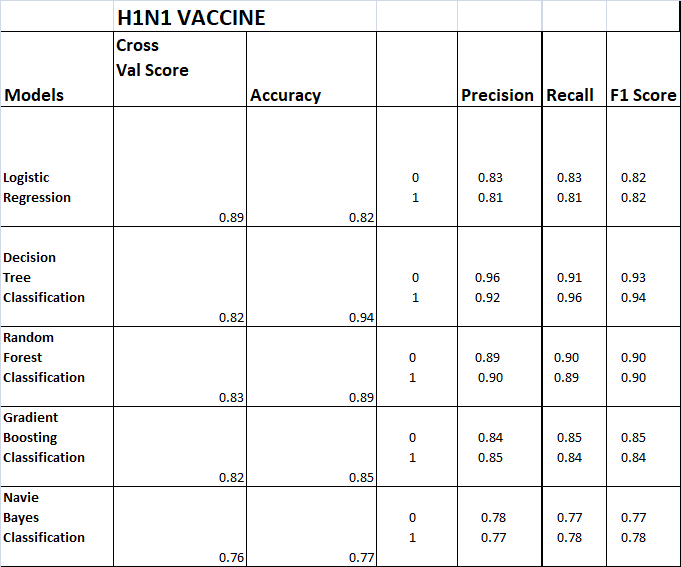

Random Forest is the best model with an accuracy 0.89 and cross val score is 0.83